### 1. 나이브베이즈
#### 1) 최대우도법 : 표본들로 파마미터(모수) 추정, 어떤 확률밀도분포추정
#### 2) 베이즈정리 : 사전확률 + 특정 변수의 데이터(새로운 정보) 결합하여 어떤 사건의 발생 신뢰도를 갱신 > P(H/E) = P(E/H)P(H) / P(E)
#### 3) 나이브베이즈 분류기법 : 사전확률 + 특정 변수의 데이터(새로운 정보) 결합하여 어떤 클래스인지 추정 > 빈도주의적 추론 적합 X, 미래예측이 목적
##### > GaussianNB(정규분포 나이브베이즈, 독립변수 = 연속형)
##### > BernoulliNB(베르누이분포 나이브베이즈, 독립변수 = 이산형)
##### > MultinomiaNB(다항분포 나이브베이즈, 다항분류, 독립변수 = 범주형)

### 2. K-NN
#### 1) 인접한 k개의 데이터를 학습하여, 회귀(average) / 분류(major voting) 
#### 2) 하이퍼파라미터 : k, 거리측정방법, 근접성에 대한 가중치 여부
#### 3) 다차원인 경우 성능 저하

# 1. titanic 데이터로 나이브베이즈 ,  KNN 모델을 이용해 분류분석 후 최적의 모델을 선정하고 그 이유를 작성하세요

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('data/titanic.csv')
df
# 1. 데이터 전처리
# 1-1) 결측치 처리
df.info() # age, embarked
df.isnull().sum()
df['age'].fillna(df['age'].mean(), inplace = True)
df['embarked'].fillna(df['embarked'].value_counts().index[0], inplace = True)

# 1-2) 중복 컬럼 제거 # class, embark_town
df.drop(columns = ['class','embark_town'], inplace = True)

# 1-3) 더미변수화
df = pd.get_dummies(df, columns = ['sex', 'embarked']) # GaussianNB는 독립변수가 연속형
df.info()
# 1-4) 데이터 분할
X = df.drop(['survived'], axis = 1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state = 2022)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age

GaussianNB_get_params :  <bound method BaseEstimator.get_params of GaussianNB()>
GaussianNB_class_prior_ :  [0.61637239 0.38362761]
GaussianNB_train_score :  0.7881219903691814
GaussianNB_test_score :  0.7873134328358209
GaussianNB_confusion_matrix
         Pred[0]  Pred[1]
True[0]      136       29
True[1]       28       75
GaussianNB_accuracy_score :  0.7873134328358209
GaussianNB_recall_score :  0.7281553398058253
GaussianNB_precision_score :  0.7211538461538461
GaussianNB_classificaion_report
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       165
           1       0.72      0.73      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

GaussianNB_ROC_AUC_SOCRE :  0.8405119152691968
GaussianNB_ROC_CURVE


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


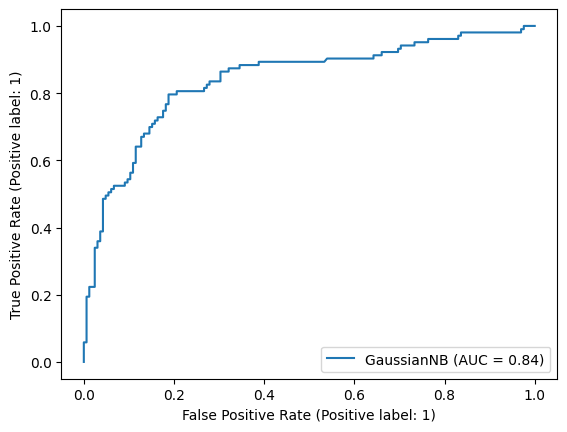

In [29]:
# 2. GaussianNB - 스케일(정규화) X, class_prior_ 설정 X
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('GaussianNB_get_params : ' , model.get_params)
print('GaussianNB_class_prior_ : ', model.class_prior_) # [0확률,1확률]
print('GaussianNB_train_score : ', model.score(X_train, y_train))
print('GaussianNB_test_score : ', model.score(X_test, y_test))

print('GaussianNB_confusion_matrix')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Pred[0]', 'Pred[1]']))
print('GaussianNB_accuracy_score : ', accuracy_score(y_test, y_pred))
print('GaussianNB_recall_score : ', recall_score(y_test, y_pred))
print('GaussianNB_precision_score : ', precision_score(y_test, y_pred))
print('GaussianNB_classificaion_report')
print(classification_report(y_test, y_pred))

print('GaussianNB_ROC_AUC_SOCRE : ', roc_auc_score(y_test, model.predict_proba(X_test)[:,-1]))
print('GaussianNB_ROC_CURVE')
print(plot_roc_curve(model, X_test, y_test))



GaussianNB_get_params :  <bound method BaseEstimator.get_params of GaussianNB()>
GaussianNB_class_prior_ :  [0.61637239 0.38362761]
GaussianNB_train_score :  0.7881219903691814
GaussianNB_test_score :  0.7873134328358209
GaussianNB_confusion_matrix
         Pred[0]  Pred[1]
True[0]        0      165
True[1]        0      103
GaussianNB_accuracy_score :  0.3843283582089552
GaussianNB_recall_score :  1.0
GaussianNB_precision_score :  0.3843283582089552
GaussianNB_classificaion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.38      1.00      0.56       103

    accuracy                           0.38       268
   macro avg       0.19      0.50      0.28       268
weighted avg       0.15      0.38      0.21       268

GaussianNB_ROC_AUC_SOCRE :  0.8405119152691968
GaussianNB_ROC_CURVE


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

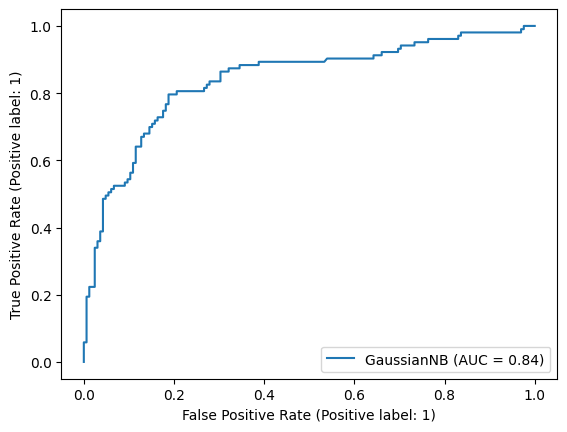

In [41]:
# 2-2) GaussianNB - 스케일(정규화) O, class_prior_ 설정 X
# score는 2-1)과 (스케일 전) 동일.
# confusion_matrix > 실제 사망자 중에 사망자로 예측한 사람이 없다.(False가 True인 경우를 예측하지 못한다.)
# Hyper Parameter 튜닝 필요 추정 > class_prior_(사전확률 설정 필요)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_train_scaled = minMaxScaler.fit_transform(X_train)
X_test_scaled = minMaxScaler.transform(X_test)

model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test)

print('GaussianNB_get_params : ' , model.get_params)
print('GaussianNB_class_prior_ : ', model.class_prior_) #[0확률,1확률]
print('GaussianNB_train_score : ', model.score(X_train_scaled, y_train))
print('GaussianNB_test_score : ', model.score(X_test_scaled, y_test))

print('GaussianNB_confusion_matrix')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Pred[0]', 'Pred[1]']))
print('GaussianNB_accuracy_score : ', accuracy_score(y_test, y_pred))
print('GaussianNB_recall_score : ', recall_score(y_test, y_pred))
print('GaussianNB_precision_score : ', precision_score(y_test, y_pred))
print('GaussianNB_classificaion_report')
print(classification_report(y_test, y_pred))

print('GaussianNB_ROC_AUC_SOCRE : ', roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,-1]))
print('GaussianNB_ROC_CURVE')
print(plot_roc_curve(model, X_test_scaled, y_test))


GaussianNB_get_params :  <bound method BaseEstimator.get_params of GaussianNB(priors=[0.5, 0.5])>
GaussianNB_class_prior_ :  [0.5 0.5]
GaussianNB_train_score :  0.7865168539325843
GaussianNB_test_score :  0.7910447761194029
GaussianNB_confusion_matrix
         Pred[0]  Pred[1]
True[0]        0      165
True[1]        0      103
GaussianNB_accuracy_score :  0.3843283582089552
GaussianNB_recall_score :  1.0
GaussianNB_precision_score :  0.3843283582089552
GaussianNB_classificaion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.38      1.00      0.56       103

    accuracy                           0.38       268
   macro avg       0.19      0.50      0.28       268
weighted avg       0.15      0.38      0.21       268

GaussianNB_ROC_AUC_SOCRE :  0.8405119152691968
GaussianNB_ROC_CURVE


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

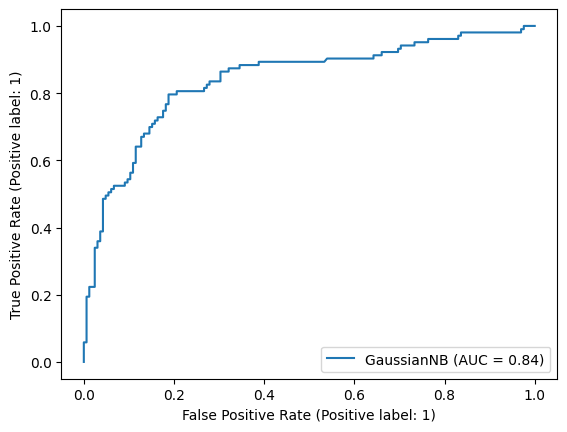

In [43]:
# 2-3) GaussianNB - 스케일(정규화) O, class_prior_ 설정 O
# 2-2) 동일

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_train_scaled = minMaxScaler.fit_transform(X_train)
X_test_scaled = minMaxScaler.transform(X_test)

model = GaussianNB(priors = [0.5,0.5]) # 사전확률 0.5 설정, [0확률,1확률]
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test)

print('GaussianNB_get_params : ' , model.get_params)
print('GaussianNB_class_prior_ : ', model.class_prior_)
print('GaussianNB_train_score : ', model.score(X_train_scaled, y_train))
print('GaussianNB_test_score : ', model.score(X_test_scaled, y_test))

print('GaussianNB_confusion_matrix')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Pred[0]', 'Pred[1]']))
print('GaussianNB_accuracy_score : ', accuracy_score(y_test, y_pred))
print('GaussianNB_recall_score : ', recall_score(y_test, y_pred))
print('GaussianNB_precision_score : ', precision_score(y_test, y_pred))
print('GaussianNB_classificaion_report')
print(classification_report(y_test, y_pred))

print('GaussianNB_ROC_AUC_SOCRE : ', roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,-1]))
print('GaussianNB_ROC_CURVE')
print(plot_roc_curve(model, X_test_scaled, y_test))


GaussianNB_get_params :  <bound method BaseEstimator.get_params of GaussianNB(priors=[0.5, 0.5])>
GaussianNB_class_prior_ :  [0.5 0.5]
GaussianNB_train_score :  0.7865168539325843
GaussianNB_test_score :  0.7910447761194029
GaussianNB_confusion_matrix
         Pred[0]  Pred[1]
True[0]      135       30
True[1]       26       77
GaussianNB_accuracy_score :  0.7910447761194029
GaussianNB_recall_score :  0.7475728155339806
GaussianNB_precision_score :  0.719626168224299
GaussianNB_classificaion_report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.72      0.75      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

GaussianNB_ROC_AUC_SOCRE :  0.8405119152691968
GaussianNB_ROC_CURVE


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


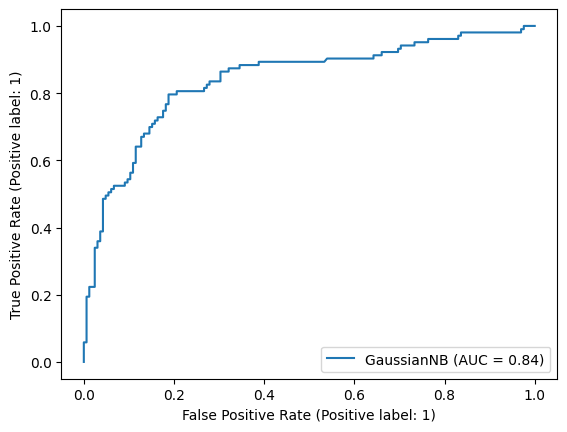

In [44]:
# 2-4) GaussianNB - 스케일(정규화) X, class_prior_ 설정 O
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve
model = GaussianNB(priors = [0.5, 0.5]) # 사전확률 설정
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('GaussianNB_get_params : ' , model.get_params)
print('GaussianNB_class_prior_ : ', model.class_prior_) #[0확률,1확률]
print('GaussianNB_train_score : ', model.score(X_train, y_train))
print('GaussianNB_test_score : ', model.score(X_test, y_test))

print('GaussianNB_confusion_matrix')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Pred[0]', 'Pred[1]']))
print('GaussianNB_accuracy_score : ', accuracy_score(y_test, y_pred))
print('GaussianNB_recall_score : ', recall_score(y_test, y_pred))
print('GaussianNB_precision_score : ', precision_score(y_test, y_pred))
print('GaussianNB_classificaion_report')
print(classification_report(y_test, y_pred))

print('GaussianNB_ROC_AUC_SOCRE : ', roc_auc_score(y_test, model.predict_proba(X_test)[:,-1]))
print('GaussianNB_ROC_CURVE')
print(plot_roc_curve(model, X_test, y_test))


BernoulliNB_class_log_prior_ :  [0.61637239 0.38362761]
BernoulliNB_1등석,어린이,여자,embarked_Q [[0.00128477 0.99871523]]
BernoulliNB_get_params :  <bound method BaseEstimator.get_params of BernoulliNB()>
BernoulliNB_train_score :  0.8057784911717496
BernoulliNB_test_score :  0.7873134328358209
BernoulliNB_confusion_matrix
         Pred[0]  Pred[1]
True[0]      137       28
True[1]       29       74
BernoulliNB_accuracy_score :  0.7873134328358209
BernoulliNB_recall_score :  0.7184466019417476
BernoulliNB_precision_score :  0.7254901960784313
BernoulliNB_classificaion_report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       165
           1       0.73      0.72      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

BernoulliNB_ROC_AUC_SOCRE :  0.8526331273904089
BernoulliNB_ROC_CURVE


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


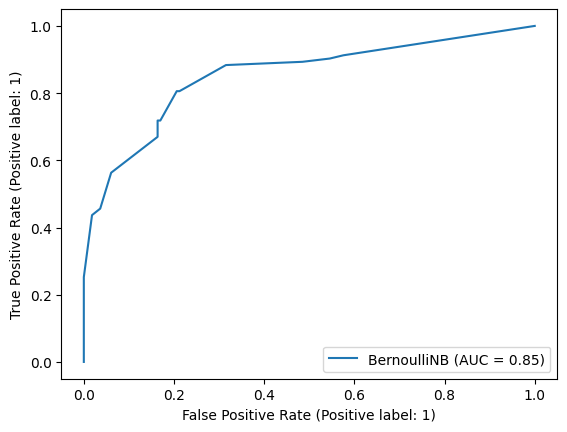

In [88]:
# BernoulliNB(독립변수 = 이산형)
# 1. 전처리 
import pandas as pd
df = pd.read_csv('data/titanic.csv')
# 1-1) 결측치 처리
#df.info() # age, embarked
df.isnull().sum()
df['age'].fillna(df['age'].mean(), inplace = True)
df['embarked'].fillna(df['embarked'].value_counts().index[0], inplace = True)

# 1-2) 중복 컬럼 제거 # class, embark_town
df.drop(columns = ['class','embark_town'], inplace = True)

# 1-3) 더미변수화 > 독립변수를 0,1로 변경필요 
df = pd.concat([df['survived'],pd.get_dummies(df[['pclass','adult_male','sex', 'embarked']], columns = ['pclass','adult_male','sex', 'embarked'])], axis = 1)
#df.info()

# 1-4) 데이터 분할
X = df.drop(['survived'], axis = 1)
y = df['survived']

# 1-5) 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 2022)

#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

# 2. BernoulliNB 적합
from sklearn.naive_bayes import BernoulliNB
import numpy as np
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('BernoulliNB_class_log_prior_ : ', np.exp(model.class_log_prior_)) # 사전확률 : 미생존 61%, 생존 38%
X_test_temp = [[1,0,0,1,0,1,0,0,0,1]]
print('BernoulliNB_1등석,어린이,여자,embarked_Q',model.predict_proba(X_test_temp)) # #[0확률,1확률] 99.8% 생존


print('BernoulliNB_get_params : ' , model.get_params)
print('BernoulliNB_train_score : ', model.score(X_train, y_train))
print('BernoulliNB_test_score : ', model.score(X_test, y_test))

print('BernoulliNB_confusion_matrix')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Pred[0]', 'Pred[1]']))
print('BernoulliNB_accuracy_score : ', accuracy_score(y_test, y_pred))
print('BernoulliNB_recall_score : ', recall_score(y_test, y_pred))
print('BernoulliNB_precision_score : ', precision_score(y_test, y_pred))
print('BernoulliNB_classificaion_report')
print(classification_report(y_test, y_pred))

print('BernoulliNB_ROC_AUC_SOCRE : ', roc_auc_score(y_test, model.predict_proba(X_test)[:,-1]))
print('BernoulliNB_ROC_CURVE')
print(plot_roc_curve(model, X_test, y_test))

In [92]:
# 2. KNN
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('data/titanic.csv')
df
# 1. 데이터 전처리
# 1-1) 결측치 처리
df.info() # age, embarked
df.isnull().sum()
df['age'].fillna(df['age'].mean(), inplace = True)
df['embarked'].fillna(df['embarked'].value_counts().index[0], inplace = True)

# 1-2) 중복 컬럼 제거 # class, embark_town
df.drop(columns = ['class','embark_town'], inplace = True)

# 1-3) 더미변수화
df = pd.get_dummies(df, columns = ['sex', 'embarked'])
df.info()
# 1-4) 데이터 분할
X = df.drop(['survived'], axis = 1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state = 2022)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age

KNN_best_k :  3
KNN_get_params :  <bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=3)>
KNN_train_score :  0.8747993579454254
KNN_test_score :  0.7201492537313433
KNN_confusion_matrix
         Pred[0]  Pred[1]
True[0]      124       41
True[1]       34       69
KNN_accuracy_score :  0.7201492537313433
KNN_recall_score :  0.6699029126213593
KNN_precision_score :  0.6272727272727273
KNN_classificaion_report
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       165
           1       0.63      0.67      0.65       103

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268

KNN_ROC_AUC_SOCRE :  0.7693733451015005
KNN_ROC_CURVE


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


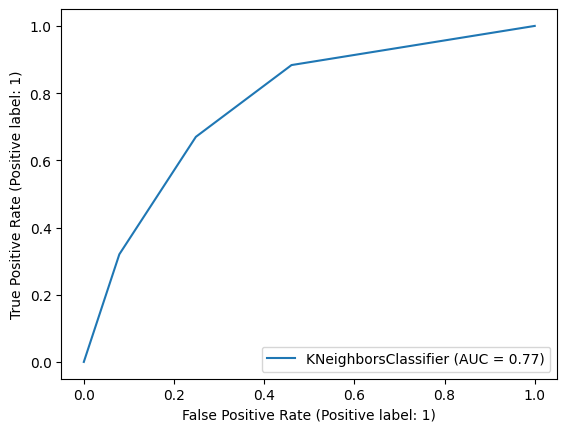

In [111]:
# 2-1) 최적의 k찾기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve

k_range = range(1,200)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    k_scores.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,-1])) # ROC_AUC_SCORE 기준으로 최적의 k찾기

k = k_scores.index(max(k_scores)) + 1 
print('KNN_best_k : ', k)

model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('KNN_get_params : ' , model.get_params)
print('KNN_train_score : ', model.score(X_train, y_train))
print('KNN_test_score : ', model.score(X_test, y_test))

print('KNN_confusion_matrix')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Pred[0]', 'Pred[1]']))
print('KNN_accuracy_score : ', accuracy_score(y_test, y_pred))
print('KNN_recall_score : ', recall_score(y_test, y_pred))
print('KNN_precision_score : ', precision_score(y_test, y_pred))
print('KNN_classificaion_report')
print(classification_report(y_test, y_pred))

print('KNN_ROC_AUC_SOCRE : ', roc_auc_score(y_test, model.predict_proba(X_test)[:,-1]))
print('KNN_ROC_CURVE')
print(plot_roc_curve(model, X_test, y_test))

    



KNN_best_k :  3
KNN_get_params :  <bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=3)>
KNN_train_score :  0.8747993579454254
KNN_test_score :  0.7201492537313433
KNN_confusion_matrix
         Pred[0]  Pred[1]
True[0]      124       41
True[1]       34       69
KNN_accuracy_score :  0.7201492537313433
KNN_recall_score :  0.6699029126213593
KNN_precision_score :  0.6272727272727273
KNN_classificaion_report
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       165
           1       0.63      0.67      0.65       103

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268

KNN_ROC_AUC_SOCRE :  0.7693733451015005
KNN_ROC_CURVE


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


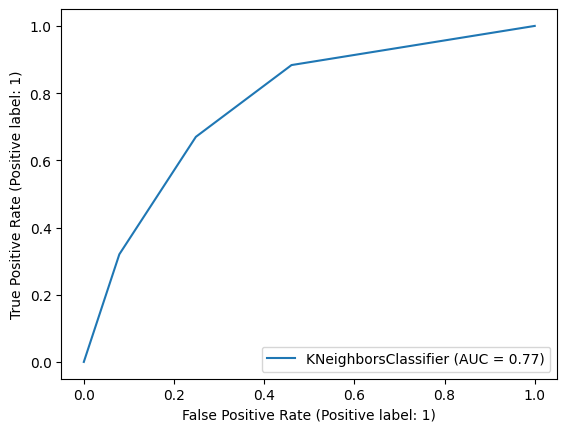

In [113]:
# 2-1) 최적의 k찾기 - cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score

k_range = range(1,200)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    # ROC_AUC_SCORE 기준으로 최적의 k찾기
    k_scores.append(cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean())

k = k_scores.index(max(k_scores)) + 1 
print('KNN_best_k : ', k)

model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('KNN_get_params : ' , model.get_params)
print('KNN_train_score : ', model.score(X_train, y_train))
print('KNN_test_score : ', model.score(X_test, y_test))

print('KNN_confusion_matrix')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Pred[0]', 'Pred[1]']))
print('KNN_accuracy_score : ', accuracy_score(y_test, y_pred))
print('KNN_recall_score : ', recall_score(y_test, y_pred))
print('KNN_precision_score : ', precision_score(y_test, y_pred))
print('KNN_classificaion_report')
print(classification_report(y_test, y_pred))

print('KNN_ROC_AUC_SOCRE : ', roc_auc_score(y_test, model.predict_proba(X_test)[:,-1]))
print('KNN_ROC_CURVE')
print(plot_roc_curve(model, X_test, y_test)) 